# Single Fund Threshold Simulation

This notebook simulates a single trader with target return thresholds, stopping when the target is reached. This tests whether early stopping can preserve capital and improve risk-adjusted returns compared to the "never stop" strategy.

Two benchmark thresholds are tested:
- **4.14%**: Current 1-year Treasury rate (risk-free benchmark)
- **10.56%**: Average NASDAQ return rate (equity market benchmark)

In [1]:
# Imports
import sys
import os
import importlib
sys.path.append(os.path.abspath('.'))

# Import and reload the module to ensure latest version
import simulation_utils
importlib.reload(simulation_utils)

from simulation_utils import (
    load_and_filter_data,
    run_single_fund_simulation,
    plot_simulation_results,
    print_simulation_summary
)
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Imports completed successfully!")

Imports completed successfully!


In [2]:
# Load and prepare data
DATA_PATH = '../dataCollection/all_filtered_markets_full_2024_2025.csv'

print("Loading market data...")
df = load_and_filter_data(DATA_PATH, start_date='2025-01-01')

print(f"Loaded {len(df):,} markets available for simulation")
print(f"Date range: {df['closingDate'].min()} to {df['closingDate'].max()}")
print(f"Markets with complete data: {len(df):,}")

# Show sample of data
print("\nSample of available markets:")
display(df[['market', 'closingDate', 'probability7d', 'probability1d', 'outcome']].head())

Loading market data...
Loaded 3,122 markets available for simulation
Date range: 2025-01-01 12:00:00+00:00 to 2025-12-25 17:30:00+00:00
Markets with complete data: 3,122

Sample of available markets:


,market,closingDate,probability7d,probability1d,outcome
0,Will Trump be Speaker by January 1?,2025-01-01 12:00:00+00:00,0.9960,0.9980,True
1,No Israel x Hamas ceasefire in 2024?,2025-01-01 12:00:00+00:00,0.9150,0.9945,True
2,Will Chris Dobey win the 2024-25 PDC World Cha...,2025-01-03 12:00:00+00:00,0.9735,0.9340,True
3,Will Michael Van Gerwen win the 2024-25 PDC Wo...,2025-01-03 12:00:00+00:00,0.8800,0.7350,True
4,Will Luke Littler win the 2024-25 PDC World Ch...,2025-01-03 12:00:00+00:00,0.6050,0.5850,False


In [12]:
# Base Simulation Parameters
BASE_PARAMS = {
    'starting_capital': 10000,           # Initial capital per fund
    'start_date': '2025-01-01',          # Simulation start date
    'max_duration_days': 365,            # Maximum simulation duration
    'days_before': 1,                    # Days before resolution to invest
    'min_prob_7d': 0.90,                 # Minimum probability at 7 days
    'min_prob_current': 0.90,            # Minimum probability at investment day
    'ending_factor_start': 0.001,         # Starting ending factor (5% chance)
    'ending_factor_increment': 0.001,    # Daily increment (0.1%)
    'skew_factor': 0.4,                  # Left skew factor for market selection
    'num_simulations': 1000               # Number of simulation runs
}

print("Base Simulation Parameters:")
print("=" * 40)
for param, value in BASE_PARAMS.items():
    print(f"{param}: {value}")

print(f"\nTwo threshold scenarios will be tested:")
print(f"1. Treasury Rate Threshold: 4.14% (risk-free benchmark)")
print(f"2. NASDAQ Average Threshold: 10.56% (equity market benchmark)")

Base Simulation Parameters:
starting_capital: 10000
start_date: 2025-01-01
max_duration_days: 365
days_before: 1
min_prob_7d: 0.9
min_prob_current: 0.9
ending_factor_start: 0.001
ending_factor_increment: 0.001
skew_factor: 0.4
num_simulations: 1000

Two threshold scenarios will be tested:
1. Treasury Rate Threshold: 4.14% (risk-free benchmark)
2. NASDAQ Average Threshold: 10.56% (equity market benchmark)


In [13]:
# Simulation 1: Treasury Rate Threshold (4.14%)
TREASURY_THRESHOLD = 0.0414  # 4.14%

print(f"Running {BASE_PARAMS['num_simulations']:,} simulations with Treasury Rate Threshold ({TREASURY_THRESHOLD:.2%})...")
print("This tests beating risk-free returns...\n")

start_time = time.time()
treasury_results = []

# Run simulations with progress bar
for i in tqdm(range(BASE_PARAMS['num_simulations']), desc="Treasury threshold sims"):
    result = run_single_fund_simulation(
        df=df,
        starting_capital=BASE_PARAMS['starting_capital'],
        start_date=BASE_PARAMS['start_date'],
        max_duration_days=BASE_PARAMS['max_duration_days'],
        days_before=BASE_PARAMS['days_before'],
        min_prob_7d=BASE_PARAMS['min_prob_7d'],
        min_prob_current=BASE_PARAMS['min_prob_current'],
        ending_factor_start=BASE_PARAMS['ending_factor_start'],
        ending_factor_increment=BASE_PARAMS['ending_factor_increment'],
        skew_factor=BASE_PARAMS['skew_factor'],
        target_return=TREASURY_THRESHOLD,
        random_seed=i
    )
    treasury_results.append(result)

elapsed_1 = time.time() - start_time
print(f"\nCompleted Treasury threshold simulations in {elapsed_1:.2f} seconds!")

Running 1,000 simulations with Treasury Rate Threshold (4.14%)...
This tests beating risk-free returns...



Treasury threshold sims: 100%|██████████| 1000/1000 [00:06<00:00, 157.09it/s]


Completed Treasury threshold simulations in 6.37 seconds!


In [14]:
# Simulation 2: NASDAQ Average Threshold (10.56%)
NASDAQ_THRESHOLD = 0.1056  # 10.56%

print(f"Running {BASE_PARAMS['num_simulations']:,} simulations with NASDAQ Average Threshold ({NASDAQ_THRESHOLD:.2%})...")
print("This tests beating equity market returns...\n")

start_time = time.time()
nasdaq_results = []

# Run simulations with progress bar
for i in tqdm(range(BASE_PARAMS['num_simulations']), desc="NASDAQ threshold sims"):
    result = run_single_fund_simulation(
        df=df,
        starting_capital=BASE_PARAMS['starting_capital'],
        start_date=BASE_PARAMS['start_date'],
        max_duration_days=BASE_PARAMS['max_duration_days'],
        days_before=BASE_PARAMS['days_before'],
        min_prob_7d=BASE_PARAMS['min_prob_7d'],
        min_prob_current=BASE_PARAMS['min_prob_current'],
        ending_factor_start=BASE_PARAMS['ending_factor_start'],
        ending_factor_increment=BASE_PARAMS['ending_factor_increment'],
        skew_factor=BASE_PARAMS['skew_factor'],
        target_return=NASDAQ_THRESHOLD,
        random_seed=i
    )
    nasdaq_results.append(result)

elapsed_2 = time.time() - start_time
print(f"\nCompleted NASDAQ threshold simulations in {elapsed_2:.2f} seconds!")
print(f"Total simulation time: {elapsed_1 + elapsed_2:.2f} seconds")

Running 1,000 simulations with NASDAQ Average Threshold (10.56%)...
This tests beating equity market returns...



NASDAQ threshold sims: 100%|██████████| 1000/1000 [00:15<00:00, 64.89it/s]


Completed NASDAQ threshold simulations in 15.42 seconds!
Total simulation time: 21.79 seconds


In [15]:
# Treasury Rate Threshold Results
print("=" * 80)
print(f"TREASURY RATE THRESHOLD RESULTS ({TREASURY_THRESHOLD:.2%})")
print("=" * 80)
print_simulation_summary(treasury_results)

TREASURY RATE THRESHOLD RESULTS (4.14%)
SIMULATION SUMMARY
Total Simulations: 1,000
Went Bust: 14 (1.4%)
Reached Target (4.1%): 965 (96.5%)
Positive Returns: 986 (98.6%)

FINAL CAPITAL STATISTICS:
Mean: $10,509.56
Median: $10,706.64
Std Dev: $1,259.15
Min: $0.00
Max: $11,231.94

RETURN STATISTICS:
Mean: 5.1%
Median: 7.1%
Std Dev: 12.6%
Min: -100.0%
Max: 12.3%

TRADE STATISTICS:
Mean Trades: 2.2
Median Trades: 1.0
Min Trades: 1
Max Trades: 10

RETURN PERCENTILES:
5th percentile: 4.2%
10th percentile: 4.5%
25th percentile: 5.8%
75th percentile: 7.1%
90th percentile: 7.1%
95th percentile: 8.0%


In [16]:
# NASDAQ Average Threshold Results
print("=" * 80)
print(f"NASDAQ AVERAGE THRESHOLD RESULTS ({NASDAQ_THRESHOLD:.2%})")
print("=" * 80)
print_simulation_summary(nasdaq_results)

NASDAQ AVERAGE THRESHOLD RESULTS (10.56%)
SIMULATION SUMMARY
Total Simulations: 1,000
Went Bust: 37 (3.7%)
Reached Target (10.6%): 841 (84.1%)
Positive Returns: 963 (96.3%)

FINAL CAPITAL STATISTICS:
Mean: $10,730.65
Median: $11,113.87
Std Dev: $2,117.93
Min: $0.00
Max: $11,910.89

RETURN STATISTICS:
Mean: 7.3%
Median: 11.1%
Std Dev: 21.2%
Min: -100.0%
Max: 19.1%

TRADE STATISTICS:
Mean Trades: 5.7
Median Trades: 5.0
Min Trades: 1
Max Trades: 23

RETURN PERCENTILES:
5th percentile: 3.3%
10th percentile: 7.2%
25th percentile: 10.7%
75th percentile: 12.4%
90th percentile: 14.3%
95th percentile: 15.5%


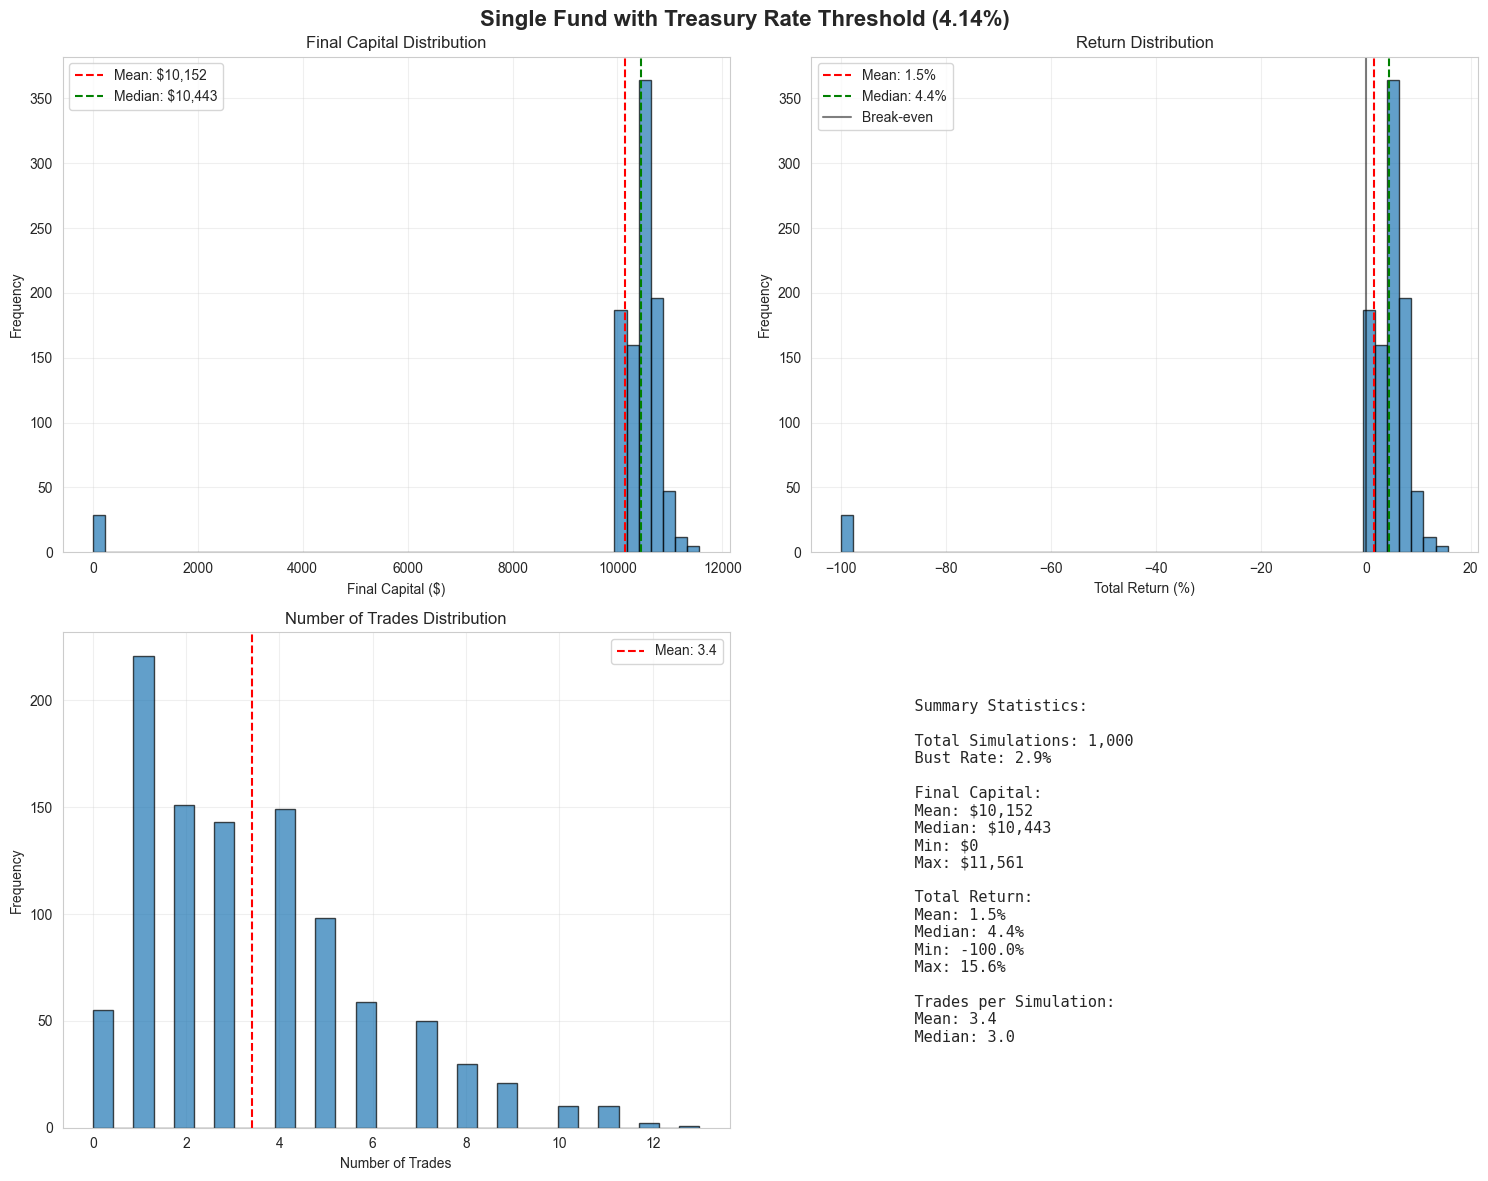

In [8]:
# Plot Treasury Rate Threshold Results
plot_simulation_results(treasury_results, 
                       title=f"Single Fund with Treasury Rate Threshold ({TREASURY_THRESHOLD:.2%})")

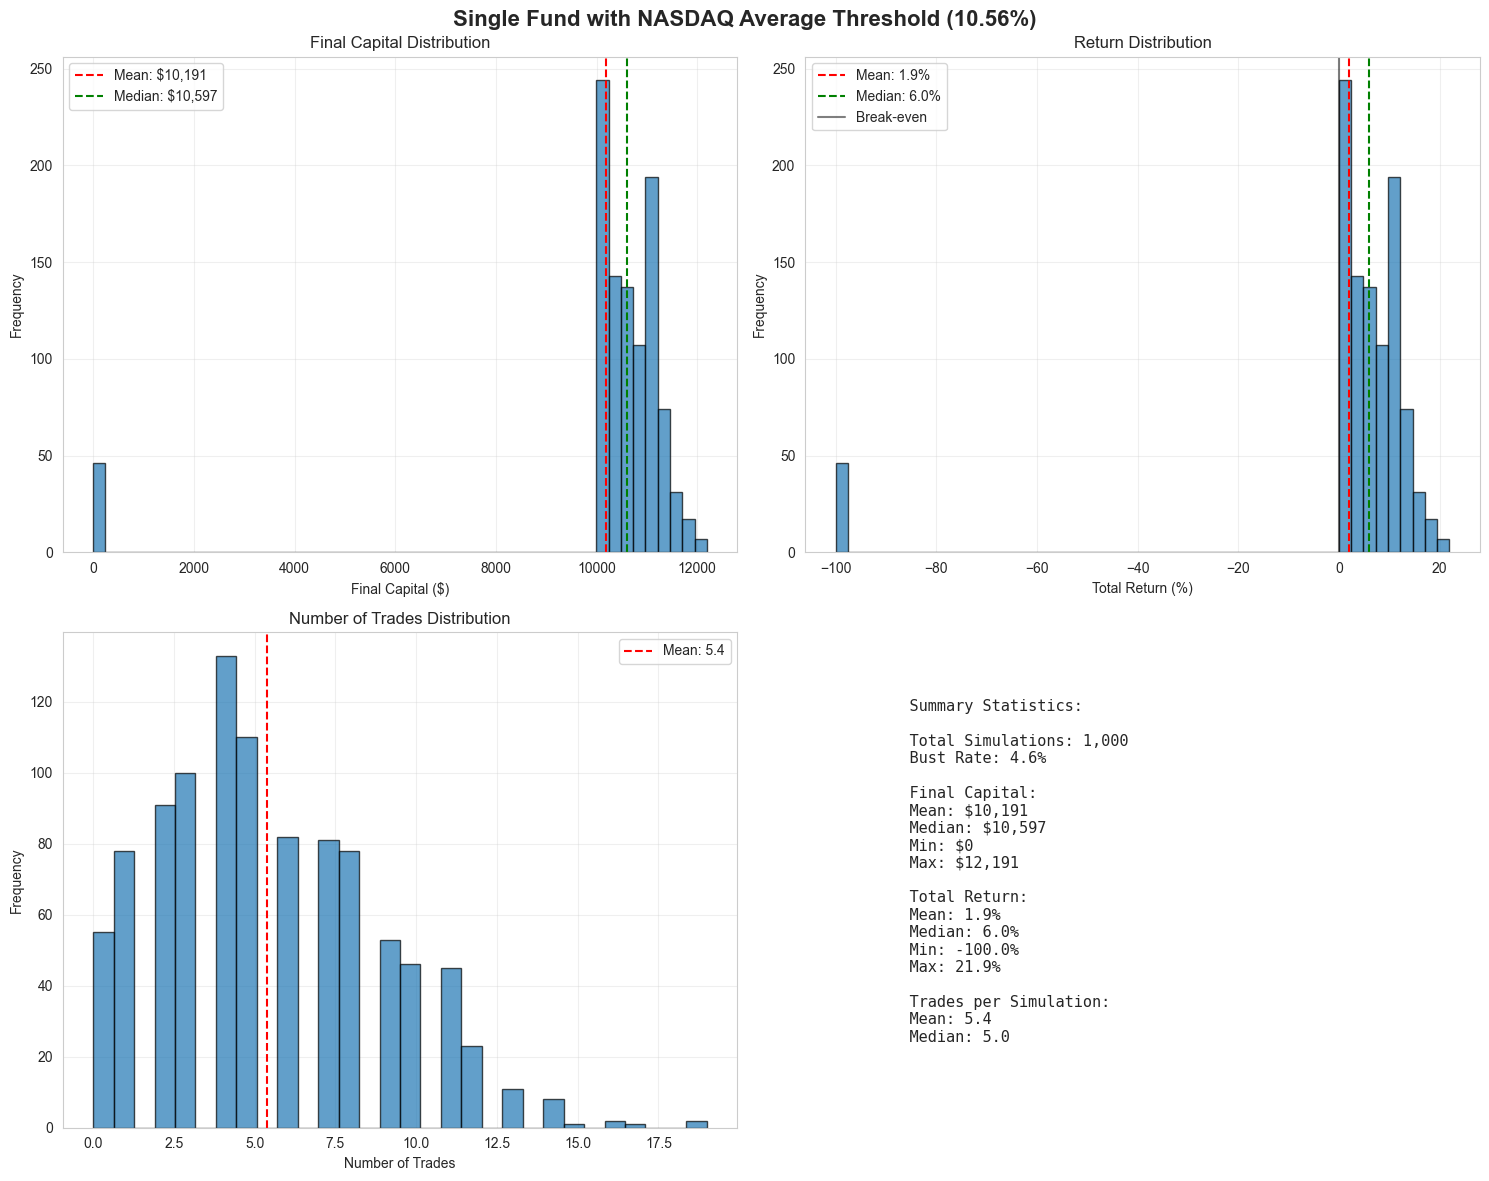

In [9]:
# Plot NASDAQ Average Threshold Results
plot_simulation_results(nasdaq_results, 
                       title=f"Single Fund with NASDAQ Average Threshold ({NASDAQ_THRESHOLD:.2%})")

In [10]:
# Comparative Analysis
print("COMPARATIVE ANALYSIS: TARGET RETURN STRATEGIES")
print("=" * 60)

# Extract key metrics for comparison
treasury_reached = sum(1 for r in treasury_results if r['reached_target']) / len(treasury_results)
nasdaq_reached = sum(1 for r in nasdaq_results if r['reached_target']) / len(nasdaq_results)

treasury_bust = sum(1 for r in treasury_results if r['went_bust']) / len(treasury_results)
nasdaq_bust = sum(1 for r in nasdaq_results if r['went_bust']) / len(nasdaq_results)

treasury_avg_trades = np.mean([r['num_trades'] for r in treasury_results])
nasdaq_avg_trades = np.mean([r['num_trades'] for r in nasdaq_results])

treasury_avg_days = np.mean([r['simulation_days'] for r in treasury_results])
nasdaq_avg_days = np.mean([r['simulation_days'] for r in nasdaq_results])

print(f"Treasury Rate Threshold ({TREASURY_THRESHOLD:.2%}):")
print(f"  Success Rate: {treasury_reached:.1%}")
print(f"  Bust Rate: {treasury_bust:.1%}")
print(f"  Avg Trades: {treasury_avg_trades:.1f}")
print(f"  Avg Duration: {treasury_avg_days:.0f} days")

print(f"\nNASDAQ Average Threshold ({NASDAQ_THRESHOLD:.2%}):")
print(f"  Success Rate: {nasdaq_reached:.1%}")
print(f"  Bust Rate: {nasdaq_bust:.1%}")
print(f"  Avg Trades: {nasdaq_avg_trades:.1f}")
print(f"  Avg Duration: {nasdaq_avg_days:.0f} days")

print(f"\nKey Insights:")
if treasury_reached > nasdaq_reached:
    print(f"• Lower threshold ({TREASURY_THRESHOLD:.2%}) more achievable than higher ({NASDAQ_THRESHOLD:.2%})")
else:
    print(f"• Surprisingly, higher threshold shows similar/better success rate")

if treasury_bust < nasdaq_bust:
    print(f"• Lower threshold reduces bust risk")
else:
    print(f"• Bust rates similar across thresholds")

print(f"• Higher targets require ~{nasdaq_avg_trades/treasury_avg_trades:.1f}x more trades on average")

COMPARATIVE ANALYSIS: TARGET RETURN STRATEGIES
Treasury Rate Threshold (4.14%):
  Success Rate: 62.3%
  Bust Rate: 2.9%
  Avg Trades: 3.4
  Avg Duration: 56 days

NASDAQ Average Threshold (10.56%):
  Success Rate: 29.5%
  Bust Rate: 4.6%
  Avg Trades: 5.4
  Avg Duration: 85 days

Key Insights:
• Lower threshold (4.14%) more achievable than higher (10.56%)
• Lower threshold reduces bust risk
• Higher targets require ~1.6x more trades on average


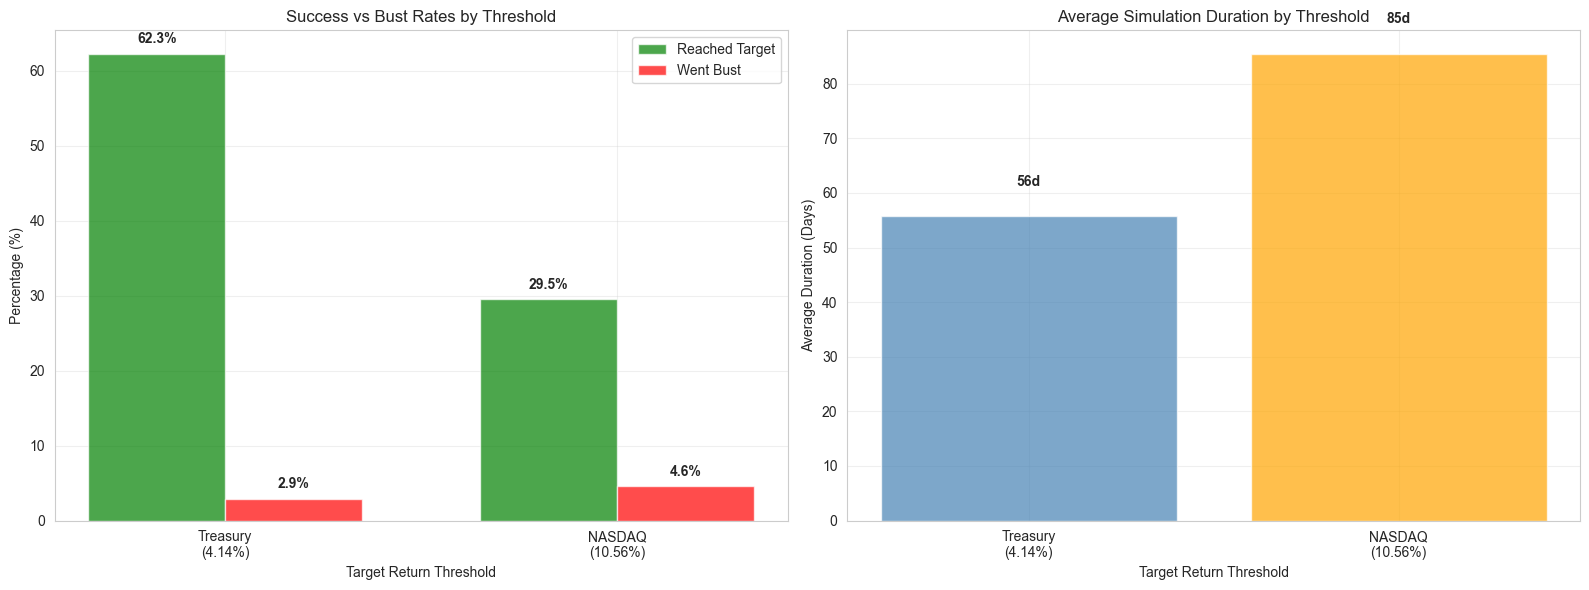

In [11]:
# Side-by-side Success Rate Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Success rates comparison
thresholds = ['Treasury\n(4.14%)', 'NASDAQ\n(10.56%)']
success_rates = [treasury_reached * 100, nasdaq_reached * 100]
bust_rates = [treasury_bust * 100, nasdaq_bust * 100]

x_pos = np.arange(len(thresholds))
width = 0.35

ax1.bar(x_pos - width/2, success_rates, width, label='Reached Target', color='green', alpha=0.7)
ax1.bar(x_pos + width/2, bust_rates, width, label='Went Bust', color='red', alpha=0.7)
ax1.set_xlabel('Target Return Threshold')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Success vs Bust Rates by Threshold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(thresholds)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add percentage labels on bars
for i, (success, bust) in enumerate(zip(success_rates, bust_rates)):
    ax1.text(i - width/2, success + 1, f'{success:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax1.text(i + width/2, bust + 1, f'{bust:.1f}%', ha='center', va='bottom', fontweight='bold')

# Average duration comparison
durations = [treasury_avg_days, nasdaq_avg_days]
ax2.bar(thresholds, durations, color=['steelblue', 'orange'], alpha=0.7)
ax2.set_xlabel('Target Return Threshold')
ax2.set_ylabel('Average Duration (Days)')
ax2.set_title('Average Simulation Duration by Threshold')
ax2.grid(True, alpha=0.3)

# Add duration labels on bars
for i, duration in enumerate(durations):
    ax2.text(i, duration + 5, f'{duration:.0f}d', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Export Results Summary (Optional)
EXPORT_RESULTS = False  # Set to True to export results

if EXPORT_RESULTS:
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    # Create comparison summary
    comparison_summary = {
        'treasury_threshold': TREASURY_THRESHOLD,
        'nasdaq_threshold': NASDAQ_THRESHOLD,
        'treasury_success_rate': treasury_reached,
        'nasdaq_success_rate': nasdaq_reached,
        'treasury_bust_rate': treasury_bust,
        'nasdaq_bust_rate': nasdaq_bust,
        'treasury_avg_trades': treasury_avg_trades,
        'nasdaq_avg_trades': nasdaq_avg_trades,
        'treasury_avg_days': treasury_avg_days,
        'nasdaq_avg_days': nasdaq_avg_days,
        'total_simulations': len(treasury_results),
        'simulation_date': timestamp
    }
    
    # Save comparison summary
    import json
    with open(f'threshold_comparison_{timestamp}.json', 'w') as f:
        json.dump(comparison_summary, f, indent=2)
    
    print(f"Results exported:")
    print(f"  - threshold_comparison_{timestamp}.json")
    print(f"Comparison summary saved for {len(treasury_results):,} simulations per threshold")
else:
    print("Results export disabled. Set EXPORT_RESULTS = True to export.")